<a href="https://colab.research.google.com/github/gaganchapa/Dog_vs_Cat_Classification/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
print(tf.__version__)

2.12.0


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.datasets import cifar10

In [64]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [65]:
X_train.max()

255

In [66]:
X_train = X_train/255
X_test = X_test/255
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

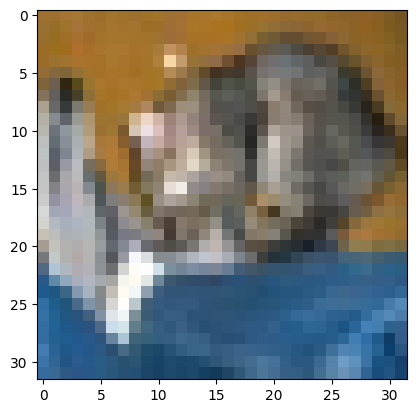

In [67]:
plt.imshow(X_test[0])


In [68]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_initializer='he_uniform',activation='relu', input_shape = [32, 32, 3]))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size=(3, 3),  kernel_initializer='he_uniform',padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.3))


model.add(Conv2D(filters=64, kernel_size=(3, 3),  kernel_initializer='he_uniform',padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [69]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 8, 8, 32)         

In [70]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [71]:
history = model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
4000/4000 [==============================] - 24s 5ms/step - loss: 1.6619 - sparse_categorical_accuracy: 0.3889 - val_loss: 1.3967 - val_sparse_categorical_accuracy: 0.5035
Epoch 2/50
4000/4000 [==============================] - 21s 5ms/step - loss: 1.3845 - sparse_categorical_accuracy: 0.4984 - val_loss: 1.2137 - val_sparse_categorical_accuracy: 0.5808
Epoch 3/50
4000/4000 [==============================] - 21s 5ms/step - loss: 1.2777 - sparse_categorical_accuracy: 0.5407 - val_loss: 1.1127 - val_sparse_categorical_accuracy: 0.6150
Epoch 4/50
4000/4000 [==============================] - 22s 5ms/step - loss: 1.2057 - sparse_categorical_accuracy: 0.5673 - val_loss: 1.0888 - val_sparse_categorical_accuracy: 0.6245
Epoch 5/50
4000/4000 [==============================] - 22s 6ms/step - loss: 1.1631 - sparse_categorical_accuracy: 0.5819 - val_loss: 1.0202 - val_sparse_categorical_accuracy: 0.6408
Epoch 6/50
4000/4000 [==============================] - 23s 6ms/step - loss: 1.1209 -

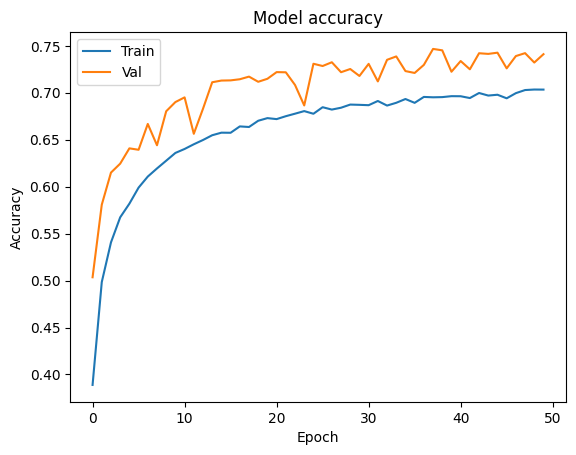

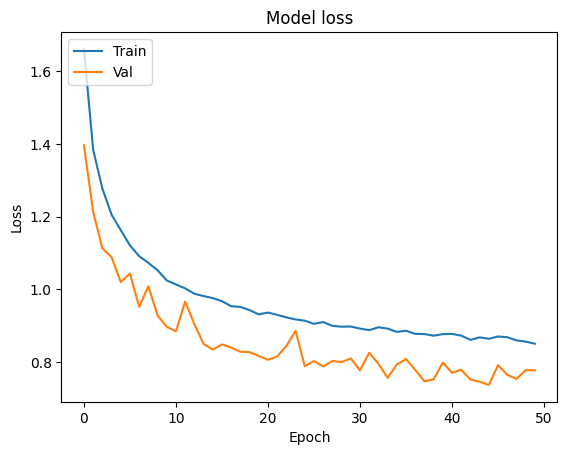

313/313 - 1s - loss: 0.7934 - sparse_categorical_accuracy: 0.7288 - 1s/epoch - 3ms/step


In [75]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [85]:
y_pred = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [94]:
classes_name[3]

'cat'

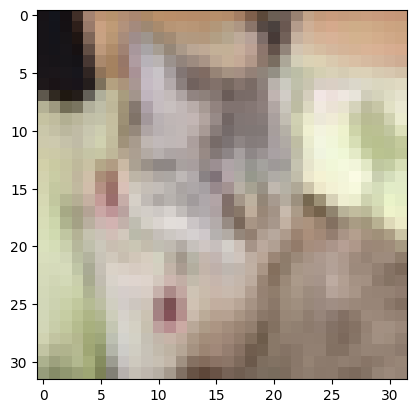

In [95]:
plt.imshow(X_test[8])

In [93]:
y_pred[8].argmax()

3

In [96]:
y_test[8]

array([3], dtype=uint8)

In [ ]:
# mat = confusion_matrix(y_test, y_pred)
# mat

In [ ]:
# plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)
